# **F1: 1.00, Credit Card Fraud Detection**

## **Powered by 42Random Forest**

In [1]:
#install old libraries for compatibility
!pip uninstall -y scikit-learn > /dev/null 2>&1
!pip uninstall -y category-encoders > /dev/null 2>&1
!pip uninstall -y imbalanced-learn > /dev/null 2>&1

!pip install scikit-learn==1.1.3 > /dev/null 2>&1
!pip install imbalanced-learn==0.9.1 > /dev/null 2>&1

### **OK, the setup is ready, let's deep into the data**

## **1) Analyze and work on data**

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

2025-04-27 15:11:04.914696: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745766665.202799      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745766665.281978      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.shape #The shape of the dataset

(284807, 31)

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.duplicated().sum() #Check for duplicates

1081

In [9]:
data.drop_duplicates(inplace=True) #Take away those duplicates
data.shape

(283726, 31)

In [10]:
#Check if the classes are unbalanced
print(pd.Series(data["Class"]).value_counts(normalize=True))

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


### **The classes are very unbalanced**

In [11]:
#Try to balance the classes
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import RandomOverSampler

X=data.drop(['Class'],axis=1)
y=data['Class']
X_over,y_over=RandomOverSampler().fit_resample(X,y)

X_train_full, X_test, y_train_full, y_test = train_test_split(X_over, y_over, test_size=0.1, random_state=42, stratify=y_over)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1111, random_state=42, stratify=y_train_full)

In [12]:
#Double check if the classes are balanced
print(pd.Series(y_train).value_counts(normalize=True))

Class
0    0.5
1    0.5
Name: proportion, dtype: float64


In [13]:
#Find out which features are categorical, numerical or heavy-tailed
categorical_cols = X_train.select_dtypes(include='object').columns
numeric_cols = X_train.select_dtypes(include=np.number).columns

print("Categorical features: ", categorical_cols)
print("Numerical features: ", numeric_cols)

from scipy.stats import skew
numeric_cols = X_train.select_dtypes(include=np.number).columns
skewed_feats = X_train[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_features = skewed_feats[skewed_feats > 0.8].index.tolist()
skewed_features = [col for col in skewed_features if col in X_train.columns]

print("High skew features:", skewed_features)

Categorical features:  Index([], dtype='object')
Numerical features:  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
High skew features: ['Amount', 'V20', 'V28', 'V2', 'V11', 'V22', 'V4']


## **2) Create a pipeline for a better preprocessing**

In [14]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer

log_transformer = make_pipeline(                      
    SimpleImputer(strategy="median"),
    FunctionTransformer(lambda x: np.log1p(np.clip(x, a_min=0, a_max=None)), feature_names_out="one-to-one"),
    StandardScaler()
)

numeric_transformer = make_pipeline(              
    SimpleImputer(strategy="median"),
    StandardScaler()
)

preprocessor = ColumnTransformer([                       
    ("log", log_transformer, skewed_features),
    ("num", numeric_transformer, list(set(numeric_cols) - set(skewed_features))),
])

## **3) Train andd evaluate different model**

## **Logistic Regression**

In [15]:
#TRAIN A LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

log_reg = Pipeline([
    ("preprocessor1", preprocessor),
    ("log_reg", LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')),
])

log_reg.fit(X_train, y_train)

#EVALUATE THE MODEL
from sklearn.model_selection import cross_val_predict
y_val_pred_1 = log_reg.predict(X_val)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
print("Confusion Matrix For Logistic Regression:\n", confusion_matrix(y_val, y_val_pred_1))

print(f"Precision: { precision_score(y_val, y_val_pred_1)}")
print(f"Recall: {recall_score(y_val, y_val_pred_1)}")
print(f"F1 Score: {f1_score(y_val, y_val_pred_1)}")

y_val_pred_proba_1 = log_reg.predict_proba(X_val)[:, 1]
print(f"ROC AUC Score: {roc_auc_score(y_val, y_val_pred_proba_1)}")

Confusion Matrix For Logistic Regression:
 [[27637   685]
 [ 2345 25978]]
Precision: 0.9743089674830289
Recall: 0.9172050983299792
F1 Score: 0.9448950641981596
ROC AUC Score: 0.9855377180810578


## **Random Forest**

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline([
    ("preprocessor1", preprocessor),
    ("rf", RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'))
])

rf_model.fit(X_train, y_train)

y_val_pred_2 = rf_model.predict(X_val)

print("Confusion Matrix For Random Forest:\n", confusion_matrix(y_val, y_val_pred_2))
print(f"Precision: {precision_score(y_val, y_val_pred_2)}")
print(f"Recall: {recall_score(y_val, y_val_pred_2)}")
print(f"F1 Score: {f1_score(y_val, y_val_pred_2)}")

y_val_pred_proba_2 = rf_model.predict_proba(X_val)[:, 1]
print(f"ROC AUC Score: {roc_auc_score(y_val, y_val_pred_proba_2)}")

Confusion Matrix For Random Forest:
 [[28321     1]
 [    0 28323]]
Precision: 0.9999646942522242
Recall: 1.0
F1 Score: 0.9999823468144826
ROC AUC Score: 1.0


### **We already find a good model**

## **4) Make the real test on the test set**

In [17]:
from sklearn.metrics import classification_report
y_test_pred_RF= cross_val_predict(rf_model, X_test, y_test, cv=3)

print(f"Confusion matrix for stacking classifier:\n {confusion_matrix(y_test, y_test_pred_RF)}")
print(f"Recall: {recall_score(y_test, y_test_pred_RF)}")
print(f"Precision:  {precision_score(y_test, y_test_pred_RF)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_RF)}")
print("Classification Report, Stacking Classifier:")
print(classification_report(y_test, y_test_pred_RF))

Confusion matrix for stacking classifier:
 [[28315    11]
 [    0 28325]]
Recall: 1.0
Precision:  0.999611801242236
F1 Score: 0.9998058629392351
Classification Report, Stacking Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       1.00      1.00      1.00     28325

    accuracy                           1.00     56651
   macro avg       1.00      1.00      1.00     56651
weighted avg       1.00      1.00      1.00     56651



## **5) Find out the best theshold**

AUC Score: 1.0000


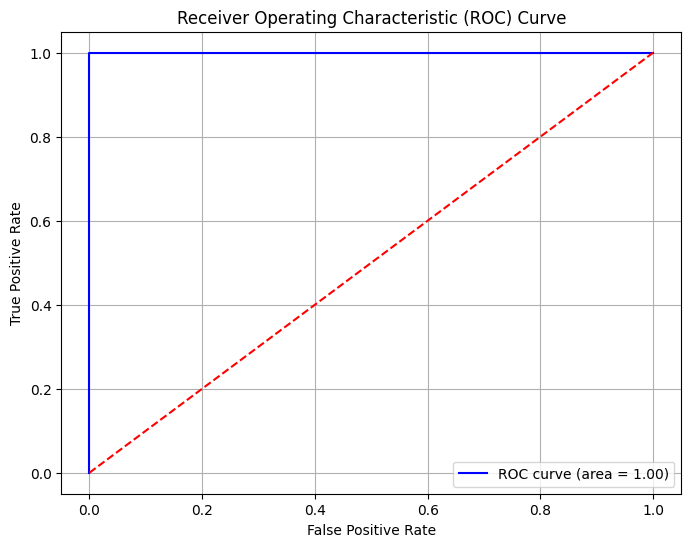

Best threshold based on Youden's J statistic: 1.0000
Confusion matrix at new threshold 1.0:
 [[28326     0]
 [    0 28325]]
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       1.00      1.00      1.00     28325

    accuracy                           1.00     56651
   macro avg       1.00      1.00      1.00     56651
weighted avg       1.00      1.00      1.00     56651



In [18]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_test_proba = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

roc_auc = roc_auc_score(y_test, y_test_proba)
print(f"AUC Score: {roc_auc:.4f}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

J_scores = tpr - fpr
best_threshold = thresholds[np.argmax(J_scores)]
print(f"Best threshold based on Youden's J statistic: {best_threshold:.4f}")

y_test_pred_new_threshold = (y_test_proba >= best_threshold).astype(int)

print(f"Confusion matrix at new threshold {best_threshold}:\n {confusion_matrix(y_test, y_test_pred_new_threshold)}")
print(f"Recall: {recall_score(y_test, y_test_pred_new_threshold)}")
print(f"Precision: {precision_score(y_test, y_test_pred_new_threshold)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_new_threshold)}")
print(classification_report(y_test, y_test_pred_new_threshold))

### **We have almost reached perfection**

## **6) Save the best model with the best theshold**

In [19]:
import joblib
joblib.dump({'model': rf_model, 'threshold': best_threshold}, 'stacking_RF_final.pkl')

['stacking_RF_final.pkl']